<a href="https://colab.research.google.com/github/Mjothikrishnan/CSE/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#----------------------------------------RAINFALL AND FLOOD RISK PREDICTION-------------------------------------------


#install required libraries

!pip install pandas numpy scikit-learn matplotlib seaborn joblib


In [6]:
#import libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib


In [7]:
#load the dataset

df = pd.read_csv("/content/rainfall in india 1901-2015.csv")
df.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [8]:
#PREPROCESS THE DATA



# Selecting relevant features
df = df[['ANNUAL', 'Jun-Sep', 'Oct-Dec']]
df.dropna(inplace=True)

# Creating a target variable (Flood Risk in %)
df['Flood Risk (%)'] = (df['ANNUAL'] / df['ANNUAL'].max()) * 100

# Splitting features and target
X = df[['Jun-Sep', 'Oct-Dec']]
y = df['Flood Risk (%)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-8-71bf19ed81db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-8-71bf19ed81db>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Flood Risk (%)'] = (df['ANNUAL'] / df['ANNUAL'].max()) * 100


In [9]:
#TRAIN THE MACHINE LEARNING MODEL

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "flood_model.pkl")

print("Model trained and saved successfully!")


Model trained and saved successfully!


In [10]:
#MODEL EVALUATION


# Predict test set
y_pred = model.predict(X_test)

# Model performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 1.9919632964896878
Mean Squared Error: 8.978676400781797
Root Mean Squared Error: 2.9964439592259686


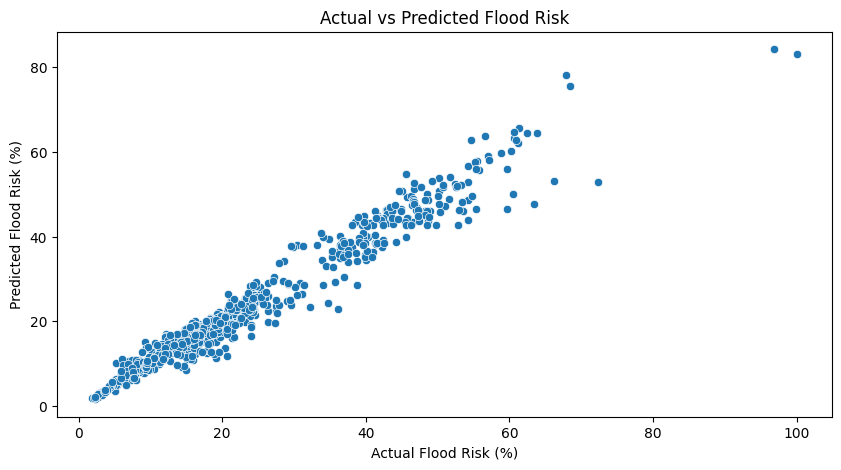

In [11]:
#VISUALIZING PREDICTIONS


plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Flood Risk (%)")
plt.ylabel("Predicted Flood Risk (%)")
plt.title("Actual vs Predicted Flood Risk")
plt.show()


In [12]:
#MAKE PREDICTIONS


def predict_flood(jun_sep, oct_dec):
    model = joblib.load("flood_model.pkl")
    features = np.array([[jun_sep, oct_dec]])
    prediction = model.predict(features)[0]
    return prediction

# Example
jun_sep_rain = 600  # Example value
oct_dec_rain = 250  # Example value
predicted_risk = predict_flood(jun_sep_rain, oct_dec_rain)
print(f"Predicted Flood Risk: {predicted_risk:.2f}%")


Predicted Flood Risk: 15.68%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
